In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import session_info
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
import statsmodels.api as sm

In [2]:
try:
    session_info_output = session_info.show()
except Exception as error:
    print("The session info has been requested already:")
    
session_info_output

In [3]:
import janitor # This library generates an error when I execute session_info()

# Import external files

- Extension of the "missing" functions from Pandas
- DataFrame and dictionary functions
- Statistical functions

In [4]:
%run utils/u.0.0-pandas_missing_extension.ipynb
%run utils/u.0.1-df_functions.ipynb
%run utils/u.0.2-statistical-functions.ipynb

# Get the processed data (V3)

In [5]:
arg_di_df_processed = pd.read_csv('../data/processed/WDICSV_PROCESSED_V3.csv').clean_names(case_type="snake")

print(arg_di_df_processed.shape)
arg_di_df_processed.info()

(54, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ny_gdp_mktp_kd_zg_cat   54 non-null     float64
 1   sp_dyn_le00_in_cat      54 non-null     float64
 2   ny_gdp_pcap_kd_cat      54 non-null     float64
 3   se_sec_enrr_cat         54 non-null     float64
 4   ny_gdp_mktp_kd_grw_cat  54 non-null     float64
 5   it_cel_sets_cat         54 non-null     float64
 6   year                    54 non-null     float64
 7   it_mlt_main             54 non-null     float64
 8   ny_gdp_pcap_kd          54 non-null     float64
 9   sp_dyn_le00_in          53 non-null     float64
 10  sh_dth_imrt             54 non-null     float64
 11  sm_pop_refg             54 non-null     float64
 12  sm_pop_refg_or          54 non-null     float64
 13  se_pre_enrr             54 non-null     float64
 14  se_sec_enrr             54 non-null

# Get columns names and types

In [6]:
indicators_names, categorical_cols, numeric_cols, columns_with_missing_values = get_columns(arg_di_df_processed, True)

In [7]:
print(f'Total Columns: {len(indicators_names)}')
print(f'Categorical Columns: {len(categorical_cols)}')
print(f'Numeric Columns: {len(numeric_cols)}')

numeric_cols = list(numeric_cols)

Total Columns: 19
Categorical Columns: 6
Numeric Columns: 13


In [8]:
arg_di_df_processed.dtypes

ny_gdp_mktp_kd_zg_cat     float64
sp_dyn_le00_in_cat        float64
ny_gdp_pcap_kd_cat        float64
se_sec_enrr_cat           float64
ny_gdp_mktp_kd_grw_cat    float64
it_cel_sets_cat           float64
year                      float64
it_mlt_main               float64
ny_gdp_pcap_kd            float64
sp_dyn_le00_in            float64
sh_dth_imrt               float64
sm_pop_refg               float64
sm_pop_refg_or            float64
se_pre_enrr               float64
se_sec_enrr               float64
sp_urb_totl_in_zs         float64
year_of_dictatorship      float64
it_cel_sets_pct           float64
dem_dep_pct               float64
dtype: object

In [9]:
indicators_names

['ny_gdp_mktp_kd_zg_cat, GDP growth categories',
 'sp_dyn_le00_in_cat, Life Expectancy categories',
 'ny_gdp_pcap_kd_cat, GDP Per Capita Categories',
 'se_sec_enrr_cat, Secondary school enrollment categories',
 'ny_gdp_mktp_kd_grw_cat, GDP Growth Volatility',
 'it_cel_sets_cat, Mobile Subscription Categories',
 'year, Year',
 'it_mlt_main, Fixed telephone subscriptions',
 'ny_gdp_pcap_kd, GDP per capita (constant 2015 US$)',
 'sp_dyn_le00_in, Life expectancy at birth, total (years)',
 'sh_dth_imrt, Number of infant deaths',
 'sm_pop_refg, Refugee population by country or territory of asylum',
 'sm_pop_refg_or, Refugee population by country or territory of origin',
 'se_pre_enrr, School enrollment, preprimary (% gross)',
 'se_sec_enrr, School enrollment, secondary (% gross)',
 'sp_urb_totl_in_zs, Urban population (% of total population)',
 'year_of_dictatorship, It was a year of military dictatorship',
 'it_cel_sets_pct, Mobile Subscription (% of total population)',
 'dem_dep_pct, Perce

In [10]:
columns_with_missing_values

['sp_dyn_le00_in']

# Split target variable

Target variable: sp_dyn_le00_in (Life expectancy at birth, total (years))

In [11]:
target_variable = "sp_dyn_le00_in"
target_variable_name = get_indicator_name(target_variable, True)

In [12]:
if target_variable in numeric_cols:
    numeric_cols.remove(target_variable)
    
if 'year' in numeric_cols:
    numeric_cols.remove('year')

## Split rows with missing values in the target variable

In [13]:
rows_with_na = arg_di_df_processed[arg_di_df_processed[target_variable].isna()].copy()
rows_with_na

,ny_gdp_mktp_kd_zg_cat,sp_dyn_le00_in_cat,ny_gdp_pcap_kd_cat,se_sec_enrr_cat,ny_gdp_mktp_kd_grw_cat,it_cel_sets_cat,year,it_mlt_main,ny_gdp_pcap_kd,sp_dyn_le00_in,sh_dth_imrt,sm_pop_refg,sm_pop_refg_or,se_pre_enrr,se_sec_enrr,sp_urb_totl_in_zs,year_of_dictatorship,it_cel_sets_pct,dem_dep_pct
53,1.0,0.0,3.0,0.0,1.0,4.0,2023.0,0.412407,1.011066,NaN,-0.924576,-0.68224,-0.184756,1.036592,1.152048,1.264111,-0.534522,1.418794,-1.852406


In [14]:
X = arg_di_df_processed.drop(index=rows_with_na.index)[numeric_cols]
y = arg_di_df_processed.drop(index=rows_with_na.index)[target_variable]

X.shape, y.shape

((53, 11), (53,))

# Apply Linear Regression

In [15]:
def plot_residuals(y_test, y_pred):
    residuals = np.subtract(y_test, y_pred.reshape(-1))
    title = "Linear Regression Residuals"
    sns.scatterplot(x=y_pred, y=residuals)
    plt.title(title)
    plt.ylabel("")
    plt.show()
    
def apply_linear_regression(X, y, with_plot=True, print_shape=False, return_model=False):

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if print_shape:
        print('X_train shape: ', X_train.shape )
        print('X_test shape: ', X_test.shape )
        print('y_train shape: ', y_train.shape)
        print('y_test shape: ', y_test.shape)

    # Model training
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    y_pred.reshape(-1)
    X_test_sm = sm.add_constant(X_test)
    
    model_sm = sm.OLS(y_test, X_test_sm).fit()

    if with_plot:
        plot_residuals(y_test, y_pred)

    if return_model:
        return model_sm
    else:
        print('mse', round(metrics.mean_squared_error(y_test, y_pred),4))
        print(model_sm.summary())
        
    return None

X_train shape:  (42, 11)
X_test shape:  (11, 11)
y_train shape:  (42,)
y_test shape:  (11,)


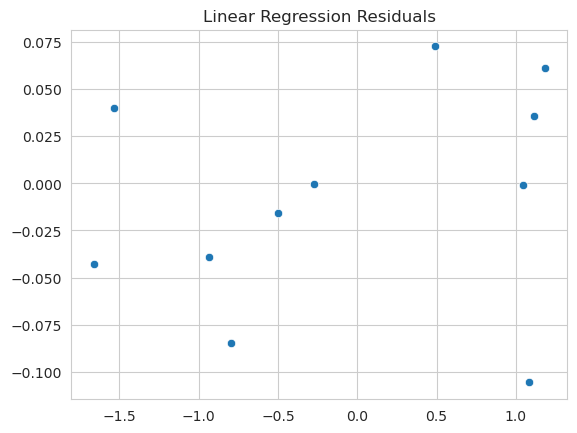

mse 0.0031
                            OLS Regression Results                            
Dep. Variable:         sp_dyn_le00_in   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 19 Aug 2025   Prob (F-statistic):                nan
Time:                        07:47:50   Log-Likelihood:                 357.16
No. Observations:                  11   AIC:                            -692.3
Df Residuals:                       0   BIC:                            -687.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                

/home/ubuntu/anaconda3/envs/research-on-argentina/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
/home/ubuntu/anaconda3/envs/research-on-argentina/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/ubuntu/anaconda3/envs/research-on-argentina/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/ubuntu/anaconda3/envs/research-on-argentina/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.d

In [16]:
apply_linear_regression(X, y, True, True)

This model is not useful due to the proportion between rows and columns

## Check correlation between variables to select less variables

<Axes: >

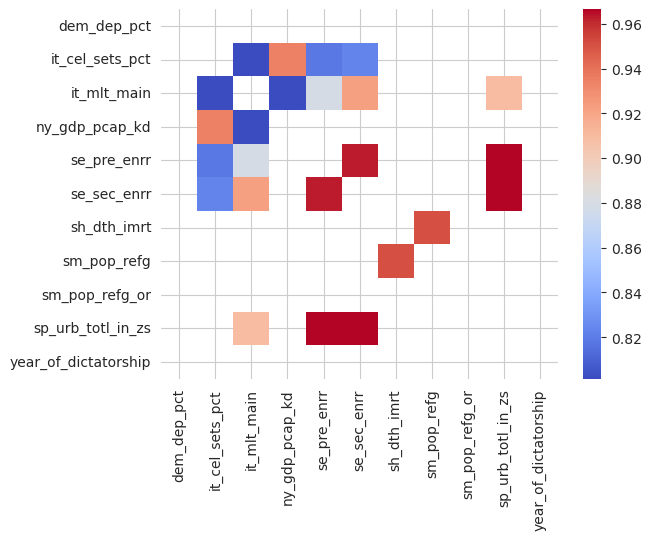

In [17]:
corr_matrix = arg_di_df_processed[sorted(numeric_cols)].corr()
high_corr_matrix = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1)]
sns.heatmap(data=high_corr_matrix, cmap='coolwarm')

### Selection of 3 variables for building the model

In [18]:
variables_by_type_of_information = pd.DataFrame([
    {'column_name':'it_mlt_main','information_type':'technology'},
    {'column_name':'ny_gdp_pcap_kd','information_type':'economic'},
    {'column_name':'sh_dth_imrt','information_type':'health'},
    {'column_name':'sm_pop_refg','information_type':'population'},
    {'column_name':'sm_pop_refg_or','information_type':'population'},
    {'column_name':'se_pre_enrr','information_type':'education'},
    {'column_name':'se_sec_enrr','information_type':'education'},
    {'column_name':'sp_urb_totl_in_zs','information_type':'population'},
    {'column_name':'it_cel_sets_pct','information_type':'technology'},
    {'column_name':'dem_dep_pct','information_type':'population'}
])

information_types = variables_by_type_of_information['information_type'].unique()

import itertools
combinations = []

for combo in itertools.combinations(variables_by_type_of_information.itertuples(index=False), 3):
    types = {combo[0].information_type, combo[1].information_type, combo[2].information_type}
    if len(types) == 3:
        combinations.append([
            combo[0].column_name,
            combo[1].column_name,
            combo[2].column_name
        ])

In [19]:
models = []

for combination in combinations:
    models.append(apply_linear_regression(X[combination],y, False, False, True)) 

In [22]:
def is_good_model(model, r2_threshold=0.7, f_pvalue_threshold=0.05, coef_pvalue_threshold=0.05):
    """
    Check if an OLS model meets the quality criteria.
    
    Parameters:
        model: A fitted statsmodels OLS object (e.g., sm.OLS(...).fit()).
        r2_threshold: Minimum R² or Adj. R² required.
        f_pvalue_threshold: Maximum acceptable p-value for F-statistic.
        coef_pvalue_threshold: Maximum acceptable p-value for individual predictors.
        
    Returns:
        bool: True if model is considered "good", otherwise False.
    """
    pvalues = model.pvalues.drop('const', errors='ignore')
        
    if (
        model.rsquared > r2_threshold
        and model.rsquared_adj > r2_threshold
        and model.f_pvalue < f_pvalue_threshold
        and any(p > coef_pvalue_threshold for p in pvalues)
    ):
        return True
    else:
        return False

In [ ]:
good_models = []
for model in models:
    if is_good_model(model):
        good_models.append(model)

59

## Apply PCA

arg_di_df_processed is already scaled

In [27]:
pca = PCA()
pca.fit(X)
pca_data_scaled = pca.transform(X)

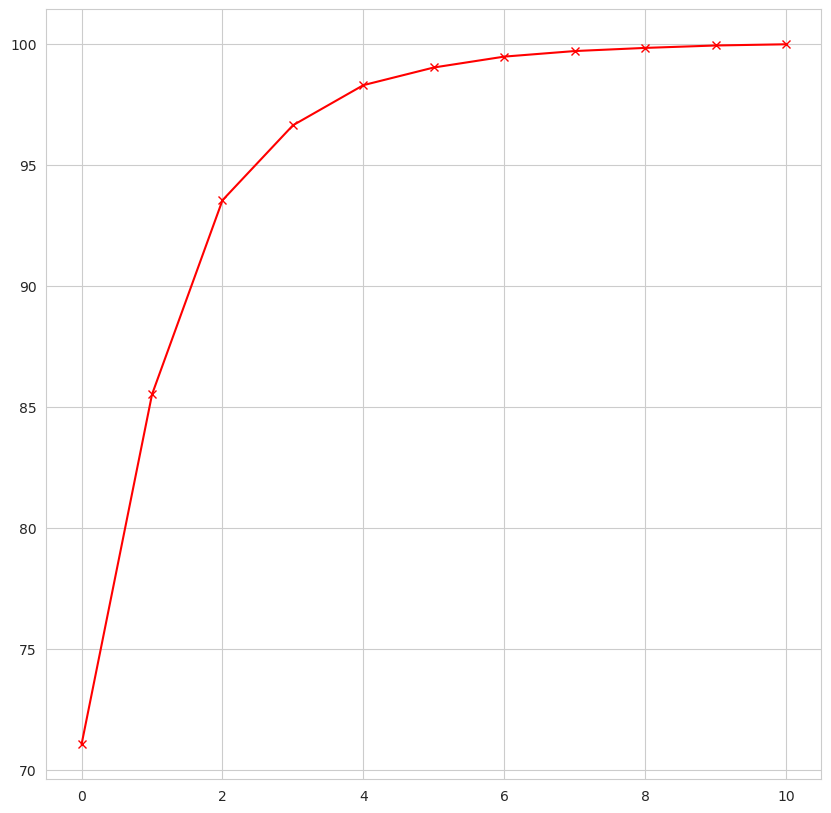

In [28]:
var = pca.explained_variance_ratio_
cum_var = np.cumsum(np.round(var, decimals=4)*100)

plt.figure(figsize=(10,10))
plt.plot(cum_var,'r-x')
plt.show()

In [37]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop(columns=[4,5,6,7,8,9,10], inplace=True)

In [38]:
pca_data_standard.head()

,0,1,2,3
0,-4.532201,-1.854976,0.801481,-0.259345
1,-4.388583,-1.880528,0.767853,-0.190175
2,-4.290122,-1.802962,0.741133,-0.123401
3,-4.299675,-1.890429,0.521783,-0.146261
4,-3.880130,-1.455514,-1.064393,-2.087991


X_train shape:  (42, 4)
X_test shape:  (11, 4)
y_train shape:  (42,)
y_test shape:  (11,)


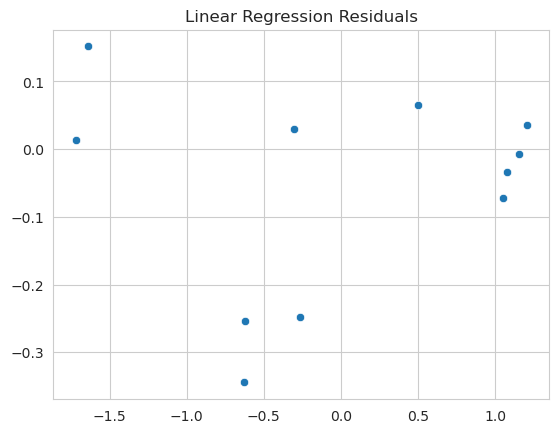

mse 0.0255
                            OLS Regression Results                            
Dep. Variable:         sp_dyn_le00_in   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     243.2
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           9.17e-07
Time:                        08:12:52   Log-Likelihood:                 11.775
No. Observations:                  11   AIC:                            -13.55
Df Residuals:                       6   BIC:                            -11.56
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0392      0.035     -1.1

/home/ubuntu/anaconda3/envs/research-on-argentina/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [39]:
apply_linear_regression(pca_data_standard, y, True, True)

X_train shape:  (42, 3)
X_test shape:  (11, 3)
y_train shape:  (42,)
y_test shape:  (11,)


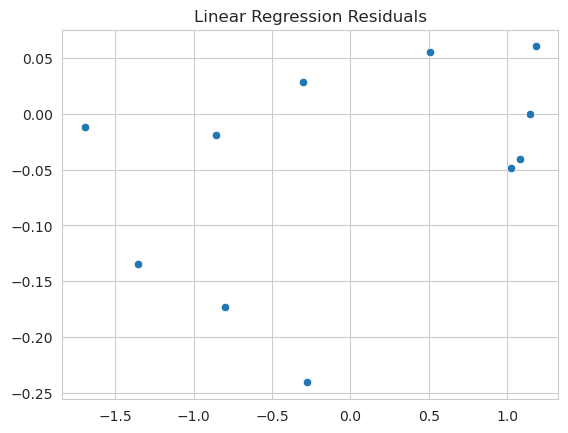

mse 0.0107
                            OLS Regression Results                            
Dep. Variable:         sp_dyn_le00_in   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     374.8
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           4.33e-08
Time:                        08:13:12   Log-Likelihood:                 11.723
No. Observations:                  11   AIC:                            -15.45
Df Residuals:                       7   BIC:                            -13.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0378      0.032     -1.1

/home/ubuntu/anaconda3/envs/research-on-argentina/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [41]:
apply_linear_regression(pca_data_standard[[0,1,2]], y, True, True)